### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft as sfft
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [61]:
len(x)

2000

**Respuesta 1.a**

Podemos ver mediante el largo de la señal que esta posee 2000 muestras, además al tener a mano el largo de la muestra y su frecuencia (100Hz), podemos calcular la duracion de la señal obteniendo el período de esta

$P = 1/f  ->  P = 1/ 100  -> P = 0.01 ms$

Dado que la señal cuenta con 2000 muestras

$ Duracion = 2000*0.01ms -> Duracion = 20 ¿ms? $

**Respuesta 1.b**

Por el teorema del muestreo podemos ver que $f_{max} < F_s/2$

por lo tanto $f_{max} < 100/2  -> f_{max} < 50 $

podemos decir que la frecuencia máxima que podemos estudiar usando la transformada de fourier es menor que 50Hz

**Gráficos**

In [68]:
#Separamos la parte real e imaginaria de x
X = np.real(x)
Y = np.imag(x)
print("x = {}, X[0] = {}, Y[0] = {}".format(x[0], X[0], Y[0]))

x = (9.904140158308326-23.73106678046714j), X[0] = 9.904140158308326, Y[0] = -23.73106678046714


In [69]:
t = np.arange(0, 20, 0.01)
len(t)

2000

C:\Users\Spun\miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


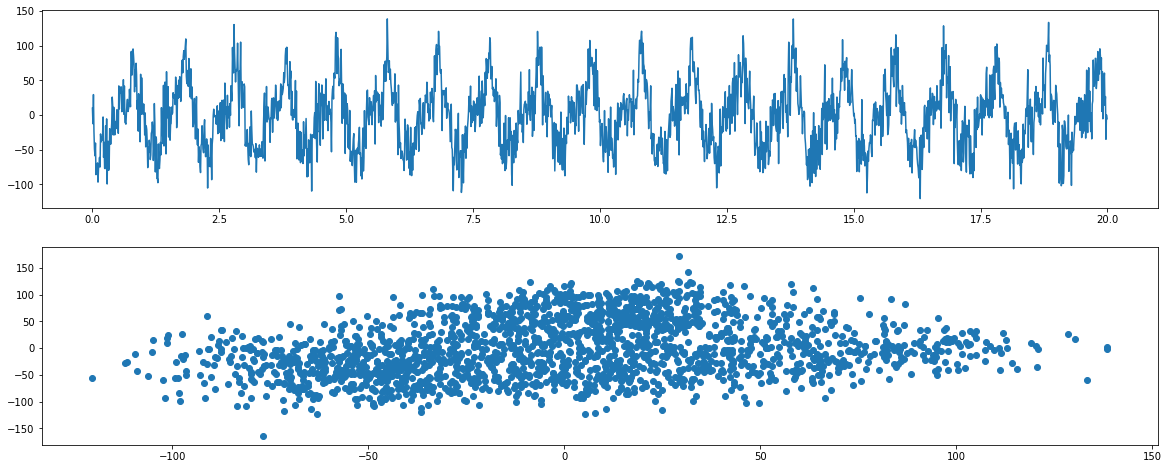

In [70]:
fig, axes = plt.subplots(2, figsize=(20, 8))

axes[0].plot(t, x)
axes[1].scatter(X, Y);

Por lo que podemos apreciar en el primer gráfico, se trataría de una señal determinista, ya que muestra un patrón claro. Además podemos apreciar que el ruido con el que cuenta es uniforme.

En el segundo gráfico vemos que los puntos se concentran de mayor forma con $-100 < x < 100$ aprox. y  en $-100 < y < 150$ aprox.

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [59]:
#Función que recibe una señal y retorna espectro de amplitud, fase y frecuencia
def carac(x):
    S = sfft.fft(x)
    SA = np.absolute(S)
    SP = np.angle(S)
    f = sfft.fftfreq(len(x), 1/100)   
    return SA, SP, f

**Gráficos Espectros de Magnitud y Fase vs Frecuencia**

Text(0.5, 1.0, 'Fase vs Freq')

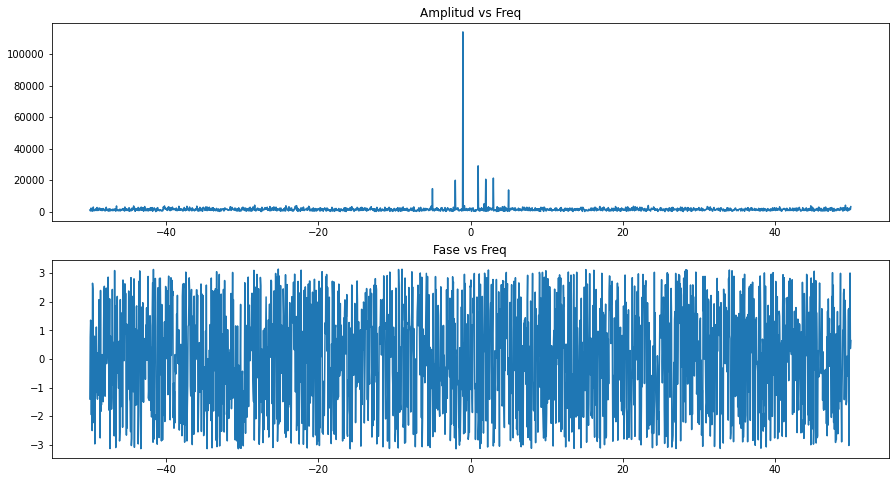

In [60]:
SA, SP, f = carac(x)

fig, ax = plt.subplots(2, figsize=(15, 8))
ax[0].plot(sfft.fftshift(f), sfft.fftshift(SA))
ax[0].set_title('Amplitud vs Freq')
ax[1].plot(sfft.fftshift(f), sfft.fftshift(SP))
ax[1].set_title('Fase vs Freq')

In [71]:
#Función que recibe espectro de amplitud y un número M, retorna el SA modificado e indices de los M componentes mayores
def saMask(SA, M):
    s = SA
    mask = np.argsort(SA) #ordena de menor a mayor
    for i in mask[:len(mask)-M]:
        s[i] = 0
    return s, mask[-M:]

In [72]:
M = 7
s, mask = saMask(SA, M)

**Gráfico Amplitud Modificada vs Frecuencia**

In [73]:
s

array([0., 0., 0., ..., 0., 0., 0.])

Text(0.5, 1.0, 'Amplitud Modificada vs Freq')

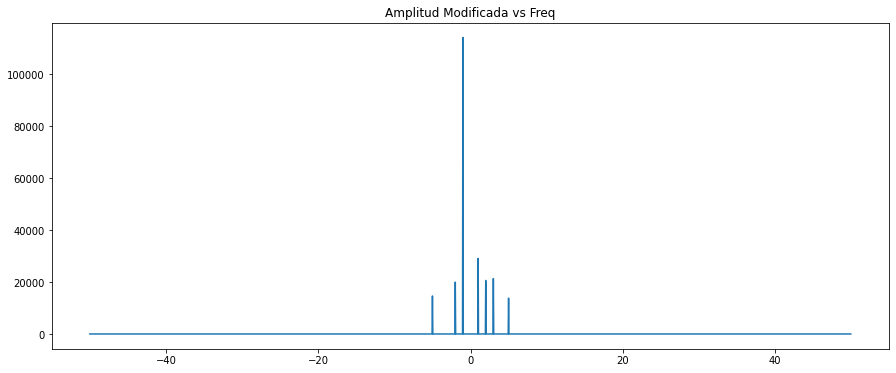

In [74]:
fig, ax = plt.subplots(1, figsize=(15, 6))
ax.plot(sfft.fftshift(f), sfft.fftshift(s))
ax.set_title('Amplitud Modificada vs Freq')

In [76]:
fd = np.sort(f[mask])[::-1]
sad = np.sort(s[mask])[::-1]
spd = np.sort(SP[mask])[::-1]

print('M componentes de mayor a menor: ')
print('Frecuencias: ', fd)
print('Espectro de magnitudes: ', sad)
print('Espectro de fase: ', spd)

M componentes de mayor a menor: 
Frecuencias:  [ 5.  3.  2.  1. -1. -2. -5.]
Espectro de magnitudes:  [114172.07496405  29095.71108497  21326.97306033  20598.95161544
  19964.34184966  14630.20281002  13788.41460493]
Espectro de fase:  [ 1.13605401  0.10721682  0.0412039  -1.29886946 -1.99649896 -2.82861611
 -3.03996873]


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

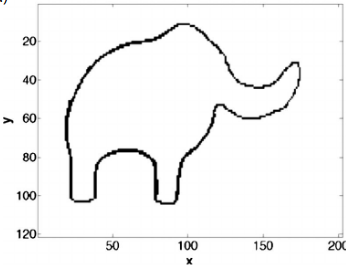